## Imports de librerias

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import tensorflow as tf
import os
import PIL
import PIL.Image

## montar drive

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Carga de carpeta donde estan todas las imagenes

In [3]:
import pathlib
data_dir = pathlib.Path("/content/drive/MyDrive/Dogs_Project/deep_learning/images")

## Numero total de imagenes

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

15921

In [ ]:
ls

angry/  happy/  relaxed/  sad/


## Division de imagenes

In [ ]:
angry = list(data_dir.glob('angry/*'))
happy = list(data_dir.glob('happy/*'))
relaxed = list(data_dir.glob('relaxed/*'))
sad = list(data_dir.glob('sad/*'))

keras abstrae bastante todo no sabia que tenia esta funcion para crear un dataset a partir de una carpeta de imagenes wow

definicion de algunos parametros

In [4]:
batch_size = 32
img_height = 32
img_width = 32

## Creacion del dataset de entrenamiento

In [5]:
training = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15921 files belonging to 4 classes.
Using 12737 files for training.


##Creacion del dataset de validacion

In [7]:
validation = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15921 files belonging to 4 classes.
Using 3184 files for validation.


## obtencion de las clases

In [8]:
class_names = validation.class_names
class_names

['angry', 'happy', 'relaxed', 'sad']

## Pequeña muestra de los datos

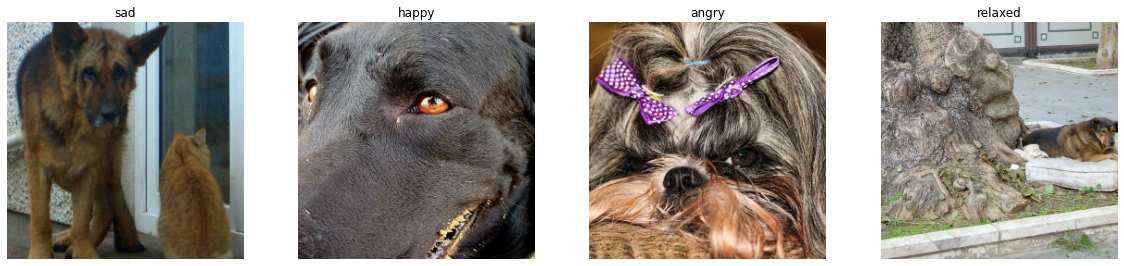

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
for images, labels in training.take(1):
  for i in range(4):
    ax = plt.subplot(1, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(training.class_names[labels[i]])
    plt.axis("off")

## Recomendaciones de tensorflow para optimizacion de la memoria

no se que tan necesario sea para 15000 imagenes, pero voy a probarlo

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

training = training.cache().prefetch(buffer_size=AUTOTUNE)
validation = validation.cache().prefetch(buffer_size=AUTOTUNE)

## Definiendo la estructura del modelo

In [ ]:
num_classes = 4
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          1

## Definiendo el optimizador, el error y la metrica a utilzar en los entrenamientos.

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

## Entrenamiento del modelo

In [ ]:
history = model.fit(
  training,
  validation_data=validation,
  epochs=100
)

Epoch 1/100
399/399 [==============================] - 2s 4ms/step - loss: 0.9727 - accuracy: 0.5949 - val_loss: 1.5115 - val_accuracy: 0.3744
Epoch 2/100
399/399 [==============================] - 2s 5ms/step - loss: 0.9137 - accuracy: 0.6224 - val_loss: 1.5991 - val_accuracy: 0.3640
Epoch 3/100
399/399 [==============================] - 2s 4ms/step - loss: 0.8478 - accuracy: 0.6570 - val_loss: 1.8045 - val_accuracy: 0.3596
Epoch 4/100
399/399 [==============================] - 2s 4ms/step - loss: 0.7723 - accuracy: 0.6917 - val_loss: 1.9284 - val_accuracy: 0.3533
Epoch 5/100
399/399 [==============================] - 2s 4ms/step - loss: 0.7012 - accuracy: 0.7208 - val_loss: 2.0247 - val_accuracy: 0.3398
Epoch 6/100
399/399 [==============================] - 2s 4ms/step - loss: 0.6527 - accuracy: 0.7430 - val_loss: 2.1805 - val_accuracy: 0.3505
Epoch 7/100
399/399 [==============================] - 2s 4ms/step - loss: 0.6346 - accuracy: 0.7535 - val_loss: 2.3088 - val_accuracy: 0.3521

##Codigo de visualizacion robado del profe rodo

In [ ]:
import plotly.express as px


seen = 'accuracy'

hist_values = history.history[seen]
eje_x = np.arange(len(hist_values))

fig = px.line(
    x=eje_x,
    y=hist_values,
    title='Historia de entrenamiento',
    labels=dict(x='Épocas', y=seen.capitalize())
)
fig.show()

## Modelo en uso

cargo la foto

In [ ]:
new_dog_image = pathlib.Path("/content/drive/MyDrive/Dogs_Project/deep_learning/testing/6.jpg")
img = tf.keras.utils.load_img(
    new_dog_image, target_size=(img_height, img_width)
)

visualizacion de la foto para ver si cargo bien

In [ ]:
PIL.Image.open(str(new_dog_image))

Output hidden; open in https://colab.research.google.com to view.

prediccion pasando los valores finales por la funcion softmax

In [ ]:
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 17ms/step
This image most likely belongs to sad with a 100.00 percent confidence.


Funciona funciona!

## Guardado del modelo

In [ ]:
model.save("/content/drive/MyDrive/Dogs_Project/deep_learning/model_v1")